In [1]:
from google.colab import drive
mount_path = '/content/gdrive/'
drive.mount(mount_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [2]:
import os
import shutil
import glob
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pytz
from zipfile import ZipFile
from tempfile import TemporaryDirectory

import cv2
from google.colab.patches import cv2_imshow
import imutils
from scipy.optimize import minimize_scalar

from sklearn.metrics import f1_score, accuracy_score

# plot options
# plt.rcParams.update({'font.size': 11})
# plt.style.use('fivethirtyeight')
# plt.style.use('default')

In [3]:
# Set and test path to competition data files
competition_path = 'My Drive/AI For Good - AI Blitz 3/Sudoku/Data/'

filename = 'train.tar.gz'
assert(os.path.exists(f'{mount_path}/{competition_path}/train.tar.gz'))
print('Drive mounted correctly and data accessible')

Drive mounted correctly and data accessible


# Load Data

In [5]:
# this can take a bit (maybe 30s)
# All_Data is the home directory for the images, from which training and validation splits will be taken
if not os.path.exists('/content/All_Data/'):
  os.mkdir('/content/All_Data/')
  shutil.unpack_archive(f'{mount_path}/{competition_path}/train.tar.gz','/content/All_Data/')
  

In [6]:
imgs=glob.glob('/content/All_Data/train/images/*.png')

### Random image

In [7]:
def sqdif(bingray,sq,ang):
  rsq=imutils.resize(imutils.rotate_bound(sq,ang),width=imsz,height=imsz)

  return np.sum(np.abs(bingray-rsq))


def derotate(img):
  sq=np.ones(img.shape)*255

  # binarize by blurring then using Otsu's method
  # blur=cv2.GaussianBlur(gray,(1,1),0)
  _,bingray = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

  rotang=minimize_scalar(lambda ang: sqdif(bingray,sq,ang),
                         bounds=[-45,45], method='Bounded').x

  if rotang<0:
    triang=np.tan(np.pi/4+rotang*np.pi/180)
    act_x=imsz/2*(1+triang)
    act_y=imsz/2*(1-triang)

    pts1 = np.float32([[0,act_y],[act_x,0],[imsz-act_x,imsz],[imsz,imsz-act_y]])

  else:
    triang=np.tan(np.pi/4-rotang*np.pi/180)
    act_x=imsz/2*(1-triang)
    act_y=imsz/2*(1+triang)

    pts1 = np.float32([[act_x,0],[imsz,imsz-act_y],[0,act_y],[imsz-act_x,imsz]])

  pts2 = np.float32([[0,0],[imsz,0],[0,imsz],[imsz,imsz]])
  M = cv2.getPerspectiveTransform(pts1,pts2)
  return cv2.warpPerspective(img,M,(imsz,imsz))

/content/All_Data/train/images/2739.png


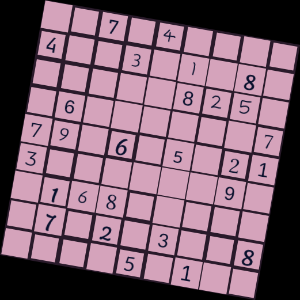

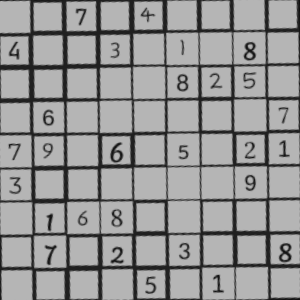

In [8]:
impath=np.random.choice(imgs)
print(impath)
img=cv2.imread(impath)
cv2_imshow(img)

# convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imsz = gray.shape[0]


img=derotate(gray)

cv2_imshow(img)


In [9]:
subimgs={}
for rowind in range(9):
  for colind in range(9):
    subimgs[rowind,colind]=img[(rowind*int(imsz/9)):((rowind+1)*int(imsz/9)),
                               (colind*int(imsz/9)):((colind+1)*int(imsz/9))]

(0,0)


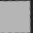

(0,1)


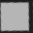

(0,2)


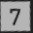

(0,3)


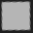

(0,4)


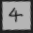

(0,5)


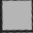

(0,6)


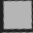

(0,7)


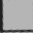

(0,8)


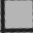

(1,0)


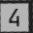

(1,1)


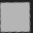

(1,2)


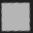

(1,3)


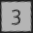

(1,4)


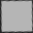

(1,5)


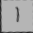

(1,6)


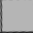

(1,7)


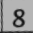

(1,8)


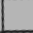

(2,0)


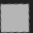

(2,1)


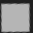

(2,2)


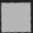

(2,3)


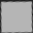

(2,4)


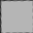

(2,5)


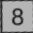

(2,6)


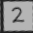

(2,7)


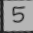

(2,8)


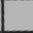

(3,0)


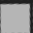

(3,1)


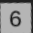

(3,2)


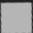

(3,3)


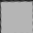

(3,4)


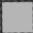

(3,5)


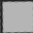

(3,6)


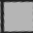

(3,7)


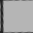

(3,8)


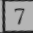

(4,0)


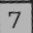

(4,1)


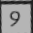

(4,2)


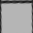

(4,3)


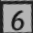

(4,4)


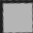

(4,5)


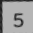

(4,6)


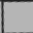

(4,7)


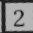

(4,8)


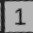

(5,0)


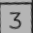

(5,1)


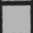

(5,2)


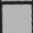

(5,3)


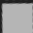

(5,4)


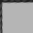

(5,5)


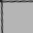

(5,6)


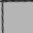

(5,7)


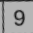

(5,8)


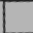

(6,0)


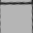

(6,1)


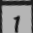

(6,2)


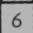

(6,3)


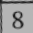

(6,4)


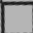

(6,5)


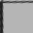

(6,6)


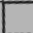

(6,7)


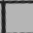

(6,8)


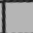

(7,0)


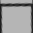

(7,1)


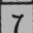

(7,2)


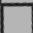

(7,3)


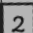

(7,4)


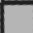

(7,5)


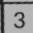

(7,6)


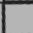

(7,7)


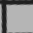

(7,8)


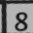

(8,0)


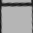

(8,1)


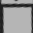

(8,2)


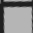

(8,3)


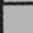

(8,4)


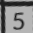

(8,5)


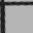

(8,6)


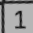

(8,7)


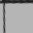

(8,8)


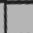

In [10]:
for rowind in range(9):
  for colind in range(9):
    print(f'({rowind},{colind})')
    cv2_imshow(subimgs[rowind,colind])